In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import pickle
import joblib

In [2]:
# Load CSV
data = pd.read_csv('data_siswa.csv')
data.head()

,no,nama,nipd,jk,nama_ayah,penghasilan_ayah,nama_ibu,tahun_ibu,pendidikan_ibu,pekerjaan_ibu,penghasilan_ibu,kelas
0,1,Adam Junior Muhlisin,1.23.3153,L,Mumu Muhlisin,"Rp. 2,000,000 - Rp. 4,999,999",Enny Asfiyah,1977.0,D3,PNS/TNI/Polri,"Rp. 2,000,000 - Rp. 4,999,999",11-PSPT
1,2,ADITIA PRASETIO,1.24.3255,L,DENI PASISRANI,"Rp. 1,000,000 - Rp. 1,999,999",SUNENGSIH,0.0,NaN,Tidak bekerja,Tidak Berpenghasilan,10-BCP
2,3,Adly Firlangga Afzaal Putra,1.24.3224,L,NaN,NaN,Nur Aini,0.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,10-TJKT
3,4,ADZRAA AQIILAH,1.22.3063,P,Mulyadi Sanang,"Rp. 2,000,000 - Rp. 4,999,999",Ika sartika,1967.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,12-DKV
4,5,Afifah Nailal Husna,1.22.3087,P,Surur Masrur,"Rp. 5,000,000 - Rp. 20,000,000",Atik Latipah,1982.0,SMA / sederajat,Tidak bekerja,Tidak Berpenghasilan,12-PSPT


In [3]:
# Menampilkan informasi dasar tentang data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                283 non-null    int64  
 1   nama              283 non-null    object 
 2   nipd              282 non-null    object 
 3   jk                283 non-null    object 
 4   nama_ayah         273 non-null    object 
 5   penghasilan_ayah  276 non-null    object 
 6   nama_ibu          283 non-null    object 
 7   tahun_ibu         282 non-null    float64
 8   pendidikan_ibu    250 non-null    object 
 9   pekerjaan_ibu     283 non-null    object 
 10  penghasilan_ibu   283 non-null    object 
 11  kelas             283 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.7+ KB
None


In [4]:
# Menampilkan jumlah nilai yang hilang di setiap kolom
print(data.isnull().sum())

no                   0
nama                 0
nipd                 1
jk                   0
nama_ayah           10
penghasilan_ayah     7
nama_ibu             0
tahun_ibu            1
pendidikan_ibu      33
pekerjaan_ibu        0
penghasilan_ibu      0
kelas                0
dtype: int64


In [5]:
# Menangani missing values: Kita akan menghapus baris yang memiliki missing values untuk kolom yang penting.
data_clean = data.dropna(subset=['penghasilan_ayah', 'penghasilan_ibu', 'pekerjaan_ibu', 'pendidikan_ibu'])

In [6]:
# Cek duplikasi
print(data.duplicated().sum())

0


In [7]:
# Menampilkan kategori yang ada dalam kolom 'penghasilan_ayah'
print(data['penghasilan_ayah'].unique())

# Menampilkan kategori yang ada dalam kolom 'penghasilan_ibu'
print(data['penghasilan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'pendidikan_ibu'
print(data['pendidikan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'kelas'
print(data['pekerjaan_ibu'].unique())

['Rp. 2,000,000 - Rp. 4,999,999' 'Rp. 1,000,000 - Rp. 1,999,999' nan
 'Rp. 5,000,000 - Rp. 20,000,000' 'Tidak Berpenghasilan'
 'Rp. 500,000 - Rp. 999,999' 'Kurang dari Rp. 500,000'
 'Lebih dari Rp. 20,000,000']
['Rp. 2,000,000 - Rp. 4,999,999' 'Tidak Berpenghasilan'
 'Rp. 1,000,000 - Rp. 1,999,999' 'Rp. 500,000 - Rp. 999,999'
 'Rp. 5,000,000 - Rp. 20,000,000' 'Kurang dari Rp. 500,000'
 'Lebih dari Rp. 20,000,000']
['D3' nan 'SMA / sederajat' 'Tidak sekolah' 'SD / sederajat'
 'SMP / sederajat' 'D4' 'S1' 'D1' 'Sp-1' 'D2' 'S2' 'Putus SD']
['PNS/TNI/Polri' 'Tidak bekerja' 'Karyawan Swasta' 'Lainnya' 'Buruh'
 'Wiraswasta' 'Petani' 'Wirausaha' 'Pedagang Kecil'
 'Tidak dapat diterapkan' 'Tenaga Kerja Indonesia']


In [8]:
# Cek jumlah nilai hilang (missing values) pada dataset
missing_values = data.isnull().sum()

# Cek distribusi kategori pada variabel kategorikal
pendapatan_ayah_dist = data['penghasilan_ayah'].value_counts()
pendapatan_ibu_dist = data['penghasilan_ibu'].value_counts()
pekerjaan_ibu_dist = data['pekerjaan_ibu'].value_counts()
pendidikan_ibu_dist = data['pendidikan_ibu'].value_counts()

missing_values, pendapatan_ayah_dist, pendapatan_ibu_dist, pekerjaan_ibu_dist, pendidikan_ibu_dist

(no                   0
 nama                 0
 nipd                 1
 jk                   0
 nama_ayah           10
 penghasilan_ayah     7
 nama_ibu             0
 tahun_ibu            1
 pendidikan_ibu      33
 pekerjaan_ibu        0
 penghasilan_ibu      0
 kelas                0
 dtype: int64,
 penghasilan_ayah
 Rp. 2,000,000 - Rp. 4,999,999     123
 Rp. 5,000,000 - Rp. 20,000,000     63
 Rp. 1,000,000 - Rp. 1,999,999      34
 Tidak Berpenghasilan               33
 Rp. 500,000 - Rp. 999,999          19
 Kurang dari Rp. 500,000             3
 Lebih dari Rp. 20,000,000           1
 Name: count, dtype: int64,
 penghasilan_ibu
 Tidak Berpenghasilan              160
 Rp. 2,000,000 - Rp. 4,999,999      57
 Rp. 1,000,000 - Rp. 1,999,999      26
 Rp. 5,000,000 - Rp. 20,000,000     19
 Rp. 500,000 - Rp. 999,999          10
 Kurang dari Rp. 500,000            10
 Lebih dari Rp. 20,000,000           1
 Name: count, dtype: int64,
 pekerjaan_ibu
 Tidak bekerja             156
 Karyawan Swas

In [9]:
# Memperbaiki perubahan dengan menggunakan .loc[] untuk menghindari peringatan
data_clean.loc[data_clean['pekerjaan_ibu'] == 'Tidak dapat diterapkan', 'pekerjaan_ibu'] = 'Lainnya'
data_clean.loc[data_clean['pendidikan_ibu'] == 'Putus SD', 'pendidikan_ibu'] = 'SD / sederajat'
data_clean.loc[data_clean['pendidikan_ibu'] == 'Sp-1', 'pendidikan_ibu'] = 'S1'
data_clean.loc[data_clean['pendidikan_ibu'] == 'Tidak sekolah', 'pendidikan_ibu'] = 'Tidak diketahui'

In [10]:
# Menampilkan kategori yang ada dalam kolom 'pendidikan_ibu'
print(data_clean['pendidikan_ibu'].unique())

# Menampilkan kategori yang ada dalam kolom 'kelas'
print(data_clean['pekerjaan_ibu'].unique())

['D3' 'SMA / sederajat' 'Tidak diketahui' 'SD / sederajat'
 'SMP / sederajat' 'D4' 'S1' 'D1' 'D2' 'S2']
['PNS/TNI/Polri' 'Tidak bekerja' 'Karyawan Swasta' 'Lainnya' 'Buruh'
 'Wiraswasta' 'Petani' 'Wirausaha' 'Pedagang Kecil'
 'Tenaga Kerja Indonesia']


In [11]:
# Menangani kolom dengan format rentang (misalnya 'Rp. 2,000,000 - Rp. 4,999,999') dan mengonversinya ke kategori numerik.
def income_range_to_numeric(income_range):
    # Menangani jika income_range adalah NaN atau tipe data yang tidak sesuai
    if pd.isna(income_range) or income_range == 'Tidak Berpenghasilan':
        return 0
    try:
        # Menghitung nilai rata-rata dari rentang penghasilan
        ranges = income_range.split(' - ')
        if len(ranges) == 2:
            min_value = int(ranges[0].replace('Rp. ', '').replace(',', '').strip())
            max_value = int(ranges[1].replace('Rp. ', '').replace(',', '').strip())
            return (min_value + max_value) / 2
    except AttributeError:
        return 0  # Jika terjadi error, anggap sebagai tidak berpenghasilan atau format yang tidak valid
    return 0


# Ubah penghasilan_ayah dan penghasilan_ibu ke format numerik
data_clean['penghasilan_ayah_numeric'] = data_clean['penghasilan_ayah'].apply(income_range_to_numeric)
data_clean['penghasilan_ibu_numeric'] = data_clean['penghasilan_ibu'].apply(income_range_to_numeric)

# Cek hasil perubahan
data_clean[['penghasilan_ayah', 'penghasilan_ayah_numeric', 'penghasilan_ibu', 'penghasilan_ibu_numeric']].head()

C:\Users\PC\AppData\Local\Temp\ipykernel_2184\1901053908.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['penghasilan_ayah_numeric'] = data_clean['penghasilan_ayah'].apply(income_range_to_numeric)
C:\Users\PC\AppData\Local\Temp\ipykernel_2184\1901053908.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['penghasilan_ibu_numeric'] = data_clean['penghasilan_ibu'].apply(income_range_to_numeric)


,penghasilan_ayah,penghasilan_ayah_numeric,penghasilan_ibu,penghasilan_ibu_numeric
0,"Rp. 2,000,000 - Rp. 4,999,999",3499999.5,"Rp. 2,000,000 - Rp. 4,999,999",3499999.5
3,"Rp. 2,000,000 - Rp. 4,999,999",3499999.5,Tidak Berpenghasilan,0.0
4,"Rp. 5,000,000 - Rp. 20,000,000",12500000.0,Tidak Berpenghasilan,0.0
5,Tidak Berpenghasilan,0.0,Tidak Berpenghasilan,0.0
6,"Rp. 500,000 - Rp. 999,999",749999.5,Tidak Berpenghasilan,0.0


In [12]:
# Menggunakan One-Hot Encoding untuk pekerjaan_ibu
data_clean = pd.get_dummies(data_clean, columns=['pekerjaan_ibu'], prefix=['pekerjaan_ibu'])

# Menentukan urutan kategori untuk pendidikan ibu (dari yang paling rendah ke yang tertinggi)
pendidikan_order = [
    'Tidak diketahui', 'SD / sederajat', 'SMP / sederajat', 'SMA / sederajat', 'D1', 'D2', 'D3', 'D4', 'S1','S2'
]

# Mengonversi kolom 'pendidikan_ibu' menjadi kategori dengan urutan yang sudah ditentukan
data_clean['pendidikan_ibu'] = pd.Categorical(data_clean['pendidikan_ibu'], categories=pendidikan_order, ordered=True)

# Mengambil kode numerik sesuai urutan kategori
data_clean['pendidikan_ibu'] = data_clean['pendidikan_ibu'].cat.codes

In [13]:
# Ganti spasi dengan underscore pada nama kolom One-Hot Encoding
data_clean.columns = [col.replace(' ', '_') for col in data_clean.columns]

In [14]:
data_clean.head()

,no,nama,nipd,jk,nama_ayah,penghasilan_ayah,nama_ibu,tahun_ibu,pendidikan_ibu,penghasilan_ibu,...,pekerjaan_ibu_Buruh,pekerjaan_ibu_Karyawan_Swasta,pekerjaan_ibu_Lainnya,pekerjaan_ibu_PNS/TNI/Polri,pekerjaan_ibu_Pedagang_Kecil,pekerjaan_ibu_Petani,pekerjaan_ibu_Tenaga_Kerja_Indonesia,pekerjaan_ibu_Tidak_bekerja,pekerjaan_ibu_Wiraswasta,pekerjaan_ibu_Wirausaha
0,1,Adam Junior Muhlisin,1.23.3153,L,Mumu Muhlisin,"Rp. 2,000,000 - Rp. 4,999,999",Enny Asfiyah,1977.0,6,"Rp. 2,000,000 - Rp. 4,999,999",...,False,False,False,True,False,False,False,False,False,False
3,4,ADZRAA AQIILAH,1.22.3063,P,Mulyadi Sanang,"Rp. 2,000,000 - Rp. 4,999,999",Ika sartika,1967.0,3,Tidak Berpenghasilan,...,False,False,False,False,False,False,False,True,False,False
4,5,Afifah Nailal Husna,1.22.3087,P,Surur Masrur,"Rp. 5,000,000 - Rp. 20,000,000",Atik Latipah,1982.0,3,Tidak Berpenghasilan,...,False,False,False,False,False,False,False,True,False,False
5,6,Age Muhammad Sa'ban,1.23.3154,L,Midarti,Tidak Berpenghasilan,Herdalis,1980.0,0,Tidak Berpenghasilan,...,False,False,False,False,False,False,False,True,False,False
6,7,Agil Hermawan,1.23.3155,L,Indra Hermawan,"Rp. 500,000 - Rp. 999,999",Yuni Amir,1988.0,1,Tidak Berpenghasilan,...,False,False,False,False,False,False,False,True,False,False


In [15]:
# Menentukan kategori potongan SPP berdasarkan total penghasilan, pendidikan ibu, dan pekerjaan ibu
def get_spp_discount(penghasilan_ayah_numeric, penghasilan_ibu_numeric, pekerjaan_ibu_Petani, pekerjaan_ibu_Pedagang_Kecil, pekerjaan_ibu_Tidak_bekerja, pendidikan_ibu):
    # Menghitung total penghasilan (dari ayah dan ibu)
    total_penghasilan = penghasilan_ayah_numeric + penghasilan_ibu_numeric

    # Potongan berdasarkan total penghasilan
    if 0 <= total_penghasilan <= 999999:
        spp = 'Potongan 70%'
    elif 1000000 <= total_penghasilan <= 1999999:
        spp = 'Potongan 50%'
    elif 2000000 <= total_penghasilan <= 4999999:
        spp = 'Potongan 30%'
    else:
        spp = 'Tidak Layak'

    # Menambahkan aturan berdasarkan pendidikan ibu
    if pendidikan_ibu >= 8:  # Misalnya, jika ibu S1 ke atas, beri potongan tambahan
        if spp == 'Potongan 70%':
            spp = 'Potongan 50%'  # Mengurangi potongan menjadi 50%
        elif spp == 'Potongan 50%':
            spp = 'Potongan 30%'  # Mengurangi potongan menjadi 30%
        elif spp == 'Potongan 30%':
            spp = 'Tidak Layak'   # Menghapus potongan
    elif pendidikan_ibu <= 3:  # Jika pendidikan ibu rendah, beri potongan lebih tinggi
        if spp == 'Potongan 50%':
            spp = 'Potongan 70%'  # Mengembalikan potongan menjadi 70%

    # Menambahkan aturan berdasarkan pekerjaan ibu (menggunakan One-Hot Encoding kolom)
    if pekerjaan_ibu_Petani == 1 or pekerjaan_ibu_Pedagang_Kecil == 1 or pekerjaan_ibu_Tidak_bekerja == 1:
        if spp == 'Potongan 50%':
            spp = 'Potongan 70%'  # Memberikan potongan lebih tinggi
        elif spp == 'Potongan 30%':
            spp = 'Potongan 50%'  # Menambah potongan

    return spp

# Menambahkan kolom 'potongan_spp' berdasarkan aturan yang ditentukan
data_clean['potongan_spp'] = data_clean.apply(lambda row: get_spp_discount(
    row['penghasilan_ayah_numeric'], 
    row['penghasilan_ibu_numeric'], 
    row['pekerjaan_ibu_Petani'], 
    row['pekerjaan_ibu_Pedagang_Kecil'], 
    row['pekerjaan_ibu_Tidak_bekerja'],
    row['pendidikan_ibu']
), axis=1)

# Menampilkan hasil target potongan SPP
data_clean[['penghasilan_ayah_numeric', 'penghasilan_ibu_numeric', 'pekerjaan_ibu_Petani', 'pekerjaan_ibu_Pedagang_Kecil', 'pekerjaan_ibu_Tidak_bekerja', 'pendidikan_ibu', 'potongan_spp']].head()


,penghasilan_ayah_numeric,penghasilan_ibu_numeric,pekerjaan_ibu_Petani,pekerjaan_ibu_Pedagang_Kecil,pekerjaan_ibu_Tidak_bekerja,pendidikan_ibu,potongan_spp
0,3499999.5,3499999.5,False,False,False,6,Tidak Layak
3,3499999.5,0.0,False,False,True,3,Potongan 50%
4,12500000.0,0.0,False,False,True,3,Tidak Layak
5,0.0,0.0,False,False,True,0,Potongan 70%
6,749999.5,0.0,False,False,True,1,Potongan 70%


In [16]:
# Menentukan fitur (X) dan target variabel (y)
X = data_clean[['penghasilan_ayah_numeric', 'penghasilan_ibu_numeric'] + 
               [col for col in data_clean.columns if 'pekerjaan_ibu' in col] + 
               ['pendidikan_ibu']]  # Fitur yang digunakan
y = data_clean['potongan_spp']  # Target: potongan SPP

In [17]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi hasil untuk data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi model: 0.98
Classification Report:
              precision    recall  f1-score   support

Potongan 30%       1.00      0.86      0.92         7
Potongan 50%       1.00      1.00      1.00        12
Potongan 70%       0.94      1.00      0.97        15
 Tidak Layak       1.00      1.00      1.00        16

    accuracy                           0.98        50
   macro avg       0.98      0.96      0.97        50
weighted avg       0.98      0.98      0.98        50



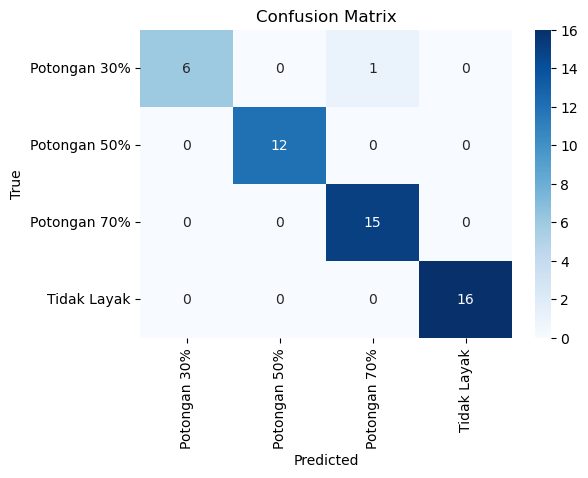

In [19]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

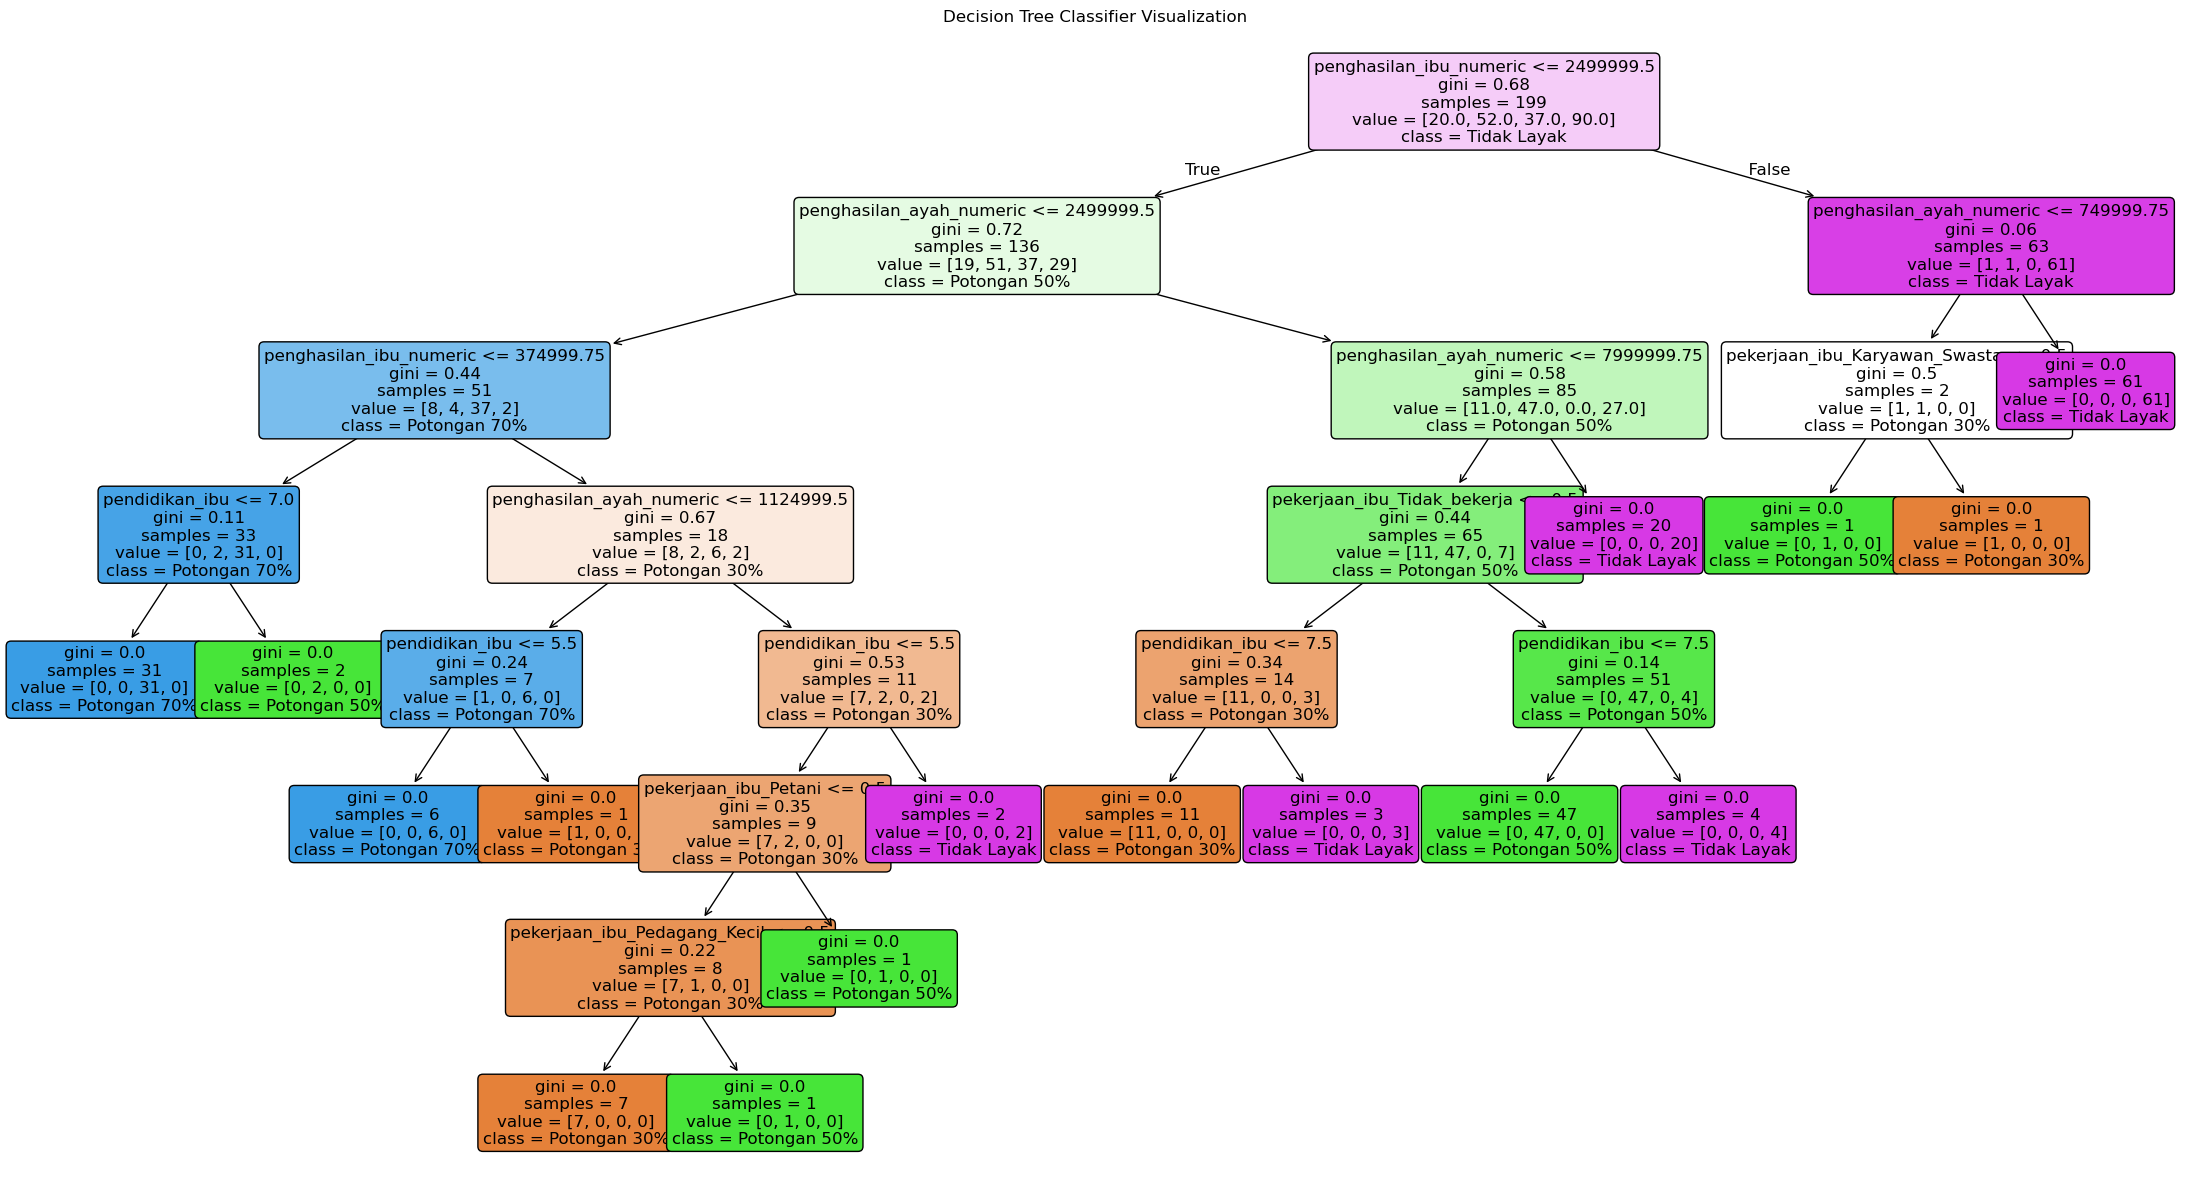

In [36]:
# Plotting the decision tree with larger font size
plt.figure(figsize=(28, 15))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=model.classes_, 
          rounded=True, 
          proportion=False, 
          precision=2, 
          fontsize=12)  # Adjust fontsize to make the text larger
plt.title("Decision Tree Classifier Visualization")
plt.show()

In [37]:
# Menyimpan model ke dalam file .pkl
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']